In [33]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

### Д3 3 (а)
После того, как первые $n$ людей заняли места у окошек, время ожидания для вторых $n$ людей -- это $X_{(i)}$

In [34]:
def calculate_time_limit_2(n: int, alpha: float):
    waiting_times = np.zeros(n)
    for _ in range(1000):
        waiting_times += np.sort(np.random.exponential(alpha, n))  
    return waiting_times / 1000

In [35]:
def plot(n: int, alphas=[0.5, 1, 1.5, 3]):
    x = np.arange(n)
    for alpha in alphas:
        y = calculate_time_limit_2(n, alpha)
        plt.plot(x, y)
    plt.xlabel("Position in the queue")
    plt.ylabel("Waiting time")
    plt.title(f"n = {n}")
    plt.legend([f"alpha = {alpha}" for alpha in alphas])
    plt.show()

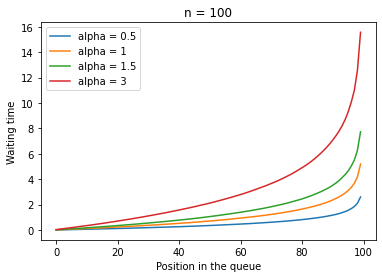

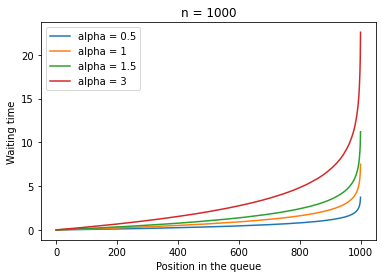

In [36]:
plot(100)
plot(1000)

На практике мы вывели, что $X_{(1)} \sim Exp(\alpha)$ и $X_{(k+1)} - X_{(k)} \sim Exp((n-k)\alpha)$ 

И сейчас экспериментально мы снова получили экспоненциальную зависимость

### ДЗ 3 (b)
Когда нет ограничений на количество обслуживаний, нам каждый раз необходимо искать первое освободившееся окно

Очередной минимум будем находить с помощью кучи

In [57]:
def calculate_time_no_limit(n: int, alpha: float, p: int):
    waiting_times = np.zeros(p)
    for _ in range(1000):
        times_memorized = np.zeros(p)
        times = list(np.random.exponential(alpha, n))
        heapq.heapify(times)
        for i in range(p):            
            times_memorized[i] = heapq.heappop(times)
            heapq.heappush(times, times_memorized[i] + np.random.exponential(alpha))
        waiting_times += times_memorized
    return waiting_times / 1000

In [58]:
def plot(n: int, p: int, alphas=[0.5, 1, 1.5, 3]):
    x = np.arange(p)
    for alpha in alphas:
        y = calculate_time_no_limit(n, alpha, p)
        plt.plot(x, y)
    plt.xlabel("Position in the queue")
    plt.ylabel("Waiting time")
    plt.title(f"n = {n}, p = {p}")
    plt.legend([f"alpha = {alpha}" for alpha in alphas])
    plt.show()

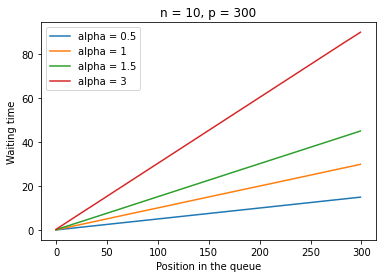

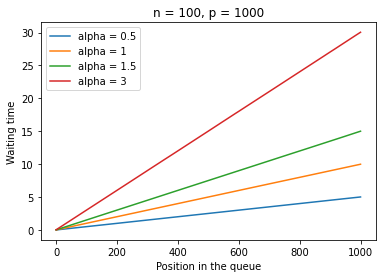

In [59]:
plot(10, 300)
plot(100, 1000)

Экспериментально получили линейную зависимость.

Можно предположить, что $X_{(k)} \sim \frac{\alpha k}{n}$